# Global sea level budget
Check how the components add up

In [2]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime

import SeaLevelContrib as slc


In [3]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '../code/SeaLevelContrib.py'>

In [4]:
def deep_steric_PJ10(first_year, last_year):
    '''Deep ocean bellow 2000m contribution to global mean sea level in cm/year,
    from Purkey and Johnson 0.1mm/year'''
    
    deep_steric = (np.arange(first_year,last_year) - first_year)*0.01
    deep_steric_df = pd.DataFrame(data={'time':np.arange(first_year,last_year), 
                                        'deep_steric':deep_steric})
    deep_steric_df = deep_steric_df.set_index('time')
    return deep_steric_df

<AxesSubplot:xlabel='time'>

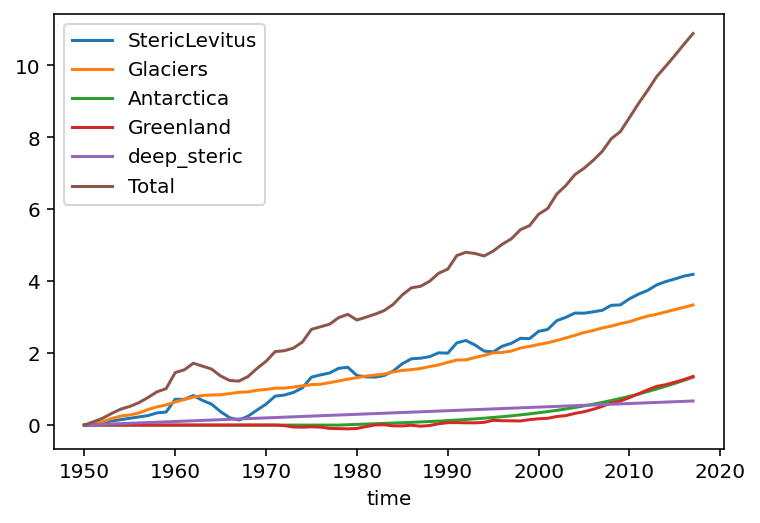

In [5]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.tws_glo_humphrey19()

deep_steric_df = deep_steric_PJ10(1950, 2020)

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
#sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='inner')
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, deep_steric_df], how='inner')
sealevel_df = sealevel_df - sealevel_df.loc[1950]

sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']

sealevel_df.plot()

In [6]:
sealevel_df

,StericLevitus,Glaciers,Antarctica,Greenland,deep_steric,Total
time,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1951,0.037695,0.044387,0.000000,0.000000,0.01,0.092082
1952,0.075390,0.093377,0.000000,0.000000,0.02,0.188766
1953,0.113085,0.180265,0.000000,0.000000,0.03,0.323350
1954,0.150780,0.251949,0.000000,0.000000,0.04,0.442728
...,...,...,...,...,...,...
2013,3.899132,3.082162,1.004522,1.077000,0.63,9.692816
2014,3.990814,3.146930,1.080473,1.123139,0.64,9.981356
2015,4.064255,3.211698,1.160647,1.192972,0.65,10.279572


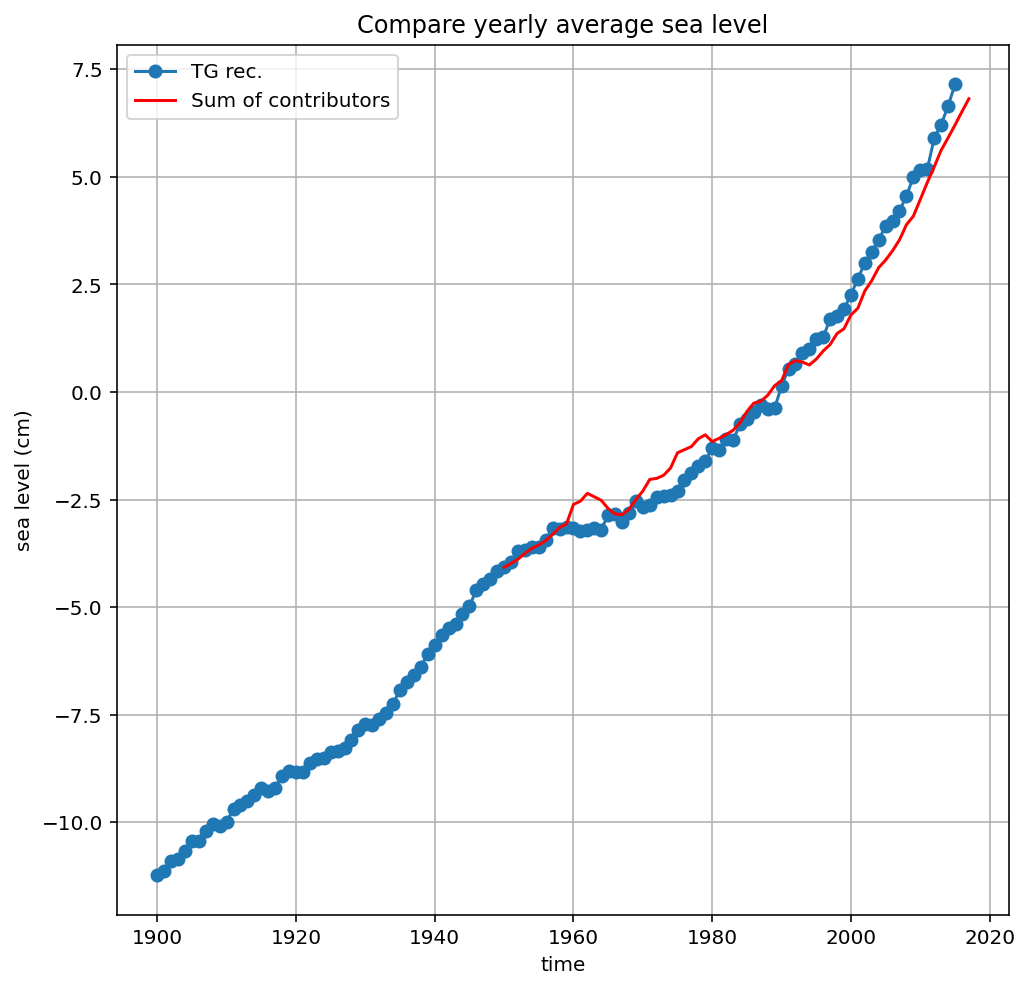

In [7]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.

### Using Frederikse et al. 2020 data

In [8]:
fts = pd.read_excel('../data/Frederikse2020/global_basin_timeseries.xlsx', sheet_name='Global')
fts = fts.rename(columns = {fts.columns[0]:'time'})
fts = fts.set_index('time')
fts.index = fts.index +0.5
fts

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [lower],Sum of contributors [mean],Sum of contributors [upper],Steric [lower],Steric [mean],Steric [upper],Glaciers [lower],...,Reservoir impoundment [upper],Groundwater depletion [lower],Groundwater depletion [mean],Groundwater depletion [upper],Natural TWS [lower],Natural TWS [mean],Natural TWS [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-203.557267,-173.261442,-141.002807,-199.227905,-173.090775,-146.755371,-58.666306,-48.279350,-37.552917,-95.500000,...,34.349998,-16.549999,-12.482123,-8.20,-3.90,-2.063471,0.0,NaN,NaN,NaN
1901.5,-201.018509,-168.801675,-135.897609,-195.460754,-170.245468,-144.462433,-58.755146,-49.144897,-38.849602,-94.599998,...,34.349998,-16.500000,-12.455986,-8.20,-1.25,0.809499,3.0,NaN,NaN,NaN
1902.5,-212.074044,-180.389967,-148.213824,-193.369812,-168.421829,-142.791672,-59.155018,-49.877560,-39.888828,-93.500000,...,34.299999,-16.500000,-12.428749,-8.15,0.00,2.109289,4.4,NaN,NaN,NaN
1903.5,-202.697564,-170.267832,-138.930518,-193.189880,-168.557556,-143.225800,-60.985012,-51.100590,-40.815861,-92.849998,...,34.299999,-16.450001,-12.399526,-8.15,0.00,2.142349,4.6,NaN,NaN,NaN
1904.5,-200.167015,-168.720071,-137.450122,-193.112183,-168.372360,-142.754593,-62.585712,-52.240177,-41.379253,-91.800003,...,34.299999,-16.400000,-12.370537,-8.10,-0.30,1.730843,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.5,3.502924,11.868936,20.258065,10.868380,12.164775,13.248381,4.308544,4.670032,5.028707,2.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.597370,12.316882,15.094145
2015.5,9.216259,17.869521,26.591747,18.938299,20.688692,22.158627,5.933526,6.744699,7.239516,3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.347687,23.342237,26.391973
2016.5,15.510550,23.941862,32.672989,21.122080,23.292170,25.237761,5.686140,6.472463,7.420359,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.668184,25.728231,28.832306


In [48]:
# Read the AR5 sea level projections
SCE = 'rcp45' # 'rcp26', 'rcp45', 'rcp60', 'rcp85'
# Old path:
#path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Final_Projections/'
# Freshely downloaded path: http://www.climatechange2013.org/report/full-report/
path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/WG1AR5_Ch13SM_datafiles/13.SM.1/'
ar5_proj = xr.open_dataset(f'{path_ar5_proj}{SCE}_sumlower.nc')
ar5_proj_df = pd.DataFrame({'time': 2006.5 + np.arange(len(ar5_proj.time))})

for contrib in ['sum', 'antdyn', 'antsmb', 'expansion', 'glacier', 'greendyn', 
                'greensmb', 'landwater']:
    for filen in [f'{SCE}_{contrib}lower', f'{SCE}_{contrib}mid', 
                  f'{SCE}_{contrib}upper']:
        ar5_proj = xr.open_dataset(f'{path_ar5_proj}{filen}.nc')
        ar5_proj_df[filen] = ar5_proj.global_average_sea_level_change

ar5_proj_df = ar5_proj_df.set_index('time')
ar5_proj_df = ar5_proj_df*100 # Convert from m to cm


In [49]:
ar5_proj_df

,rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,rcp45_antsmblower,rcp45_antsmbmid,rcp45_antsmbupper,rcp45_expansionlower,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
2006.5,2.474571,3.153517,3.790679,0.270528,0.291475,0.312422,-0.018906,-0.007650,-0.000886,0.823883,...,1.322468,0.168414,0.177101,0.185787,0.149072,0.156898,0.173014,0.026543,0.038110,0.049677
2007.5,2.709736,3.510992,4.251673,0.290110,0.333899,0.377689,-0.037010,-0.014537,-0.000925,0.943130,...,1.537088,0.191155,0.208902,0.226650,0.151855,0.167401,0.199299,0.052170,0.076440,0.100710
2008.5,2.930905,3.883757,4.765600,0.308749,0.377274,0.445799,-0.056560,-0.022317,-0.001590,1.028416,...,1.734044,0.213724,0.240905,0.268087,0.155245,0.178952,0.227670,0.076883,0.114990,0.153097
2009.5,3.128190,4.248186,5.269444,0.326442,0.421598,0.516754,-0.079909,-0.030546,-0.000529,1.134607,...,1.940068,0.236120,0.273110,0.310099,0.157061,0.191127,0.260862,0.100681,0.153760,0.206839
2010.5,3.387735,4.631002,5.768739,0.343190,0.466872,0.590553,-0.103487,-0.039772,-0.001049,1.259880,...,2.131455,0.258344,0.305515,0.352687,0.160380,0.204443,0.294781,0.123564,0.192750,0.261936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,34.231018,50.355194,67.429672,-1.686324,7.786491,17.259308,-5.571875,-2.696854,-0.876120,14.840653,...,19.338850,1.516971,3.795450,6.073929,1.709415,4.410976,10.317508,-1.275325,4.310905,9.897134
2096.5,34.578812,50.951130,68.282974,-1.750826,7.913444,17.577715,-5.660884,-2.743027,-0.893935,14.969824,...,19.540779,1.524362,3.845162,6.165960,1.742449,4.489833,10.495715,-1.331123,4.368812,10.068748
2097.5,34.937756,51.574306,69.184059,-1.816272,8.041347,17.898966,-5.749398,-2.788507,-0.910100,15.109086,...,19.739004,1.531580,3.895073,6.258565,1.772725,4.566470,10.672791,-1.387836,4.426939,10.241715


In [50]:
cts_df = fts[['Observed GMSL [lower]', 'Observed GMSL [mean]', 'Observed GMSL [upper]']]
cts_df = cts_df - cts_df['Observed GMSL [mean]'].loc[1986:2006].mean()
cts_df['Sum of contributors [mean]'] = (fts['Sum of contributors [mean]'] - 
                                         fts['Sum of contributors [mean]'].loc[1986:2006].mean())
cts_df = cts_df/10 #Convert from mm to cm
cts_df = pd.concat([cts_df, ar5_proj_df], axis=1, join='outer')
cts_df

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [mean],rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-16.039829,-13.010247,-9.784383,-13.210246,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901.5,-15.785954,-12.564270,-9.273864,-12.925716,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902.5,-16.891507,-13.723099,-10.505485,-12.743352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903.5,-15.953859,-12.710886,-9.577154,-12.756925,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904.5,-15.700804,-12.556110,-9.429115,-12.738405,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,NaN,NaN,NaN,NaN,34.231018,50.355194,67.429672,-1.686324,7.786491,17.259308,...,19.338850,1.516971,3.795450,6.073929,1.709415,4.410976,10.317508,-1.275325,4.310905,9.897134
2096.5,NaN,NaN,NaN,NaN,34.578812,50.951130,68.282974,-1.750826,7.913444,17.577715,...,19.540779,1.524362,3.845162,6.165960,1.742449,4.489833,10.495715,-1.331123,4.368812,10.068748
2097.5,NaN,NaN,NaN,NaN,34.937756,51.574306,69.184059,-1.816272,8.041347,17.898966,...,19.739004,1.531580,3.895073,6.258565,1.772725,4.566470,10.672791,-1.387836,4.426939,10.241715


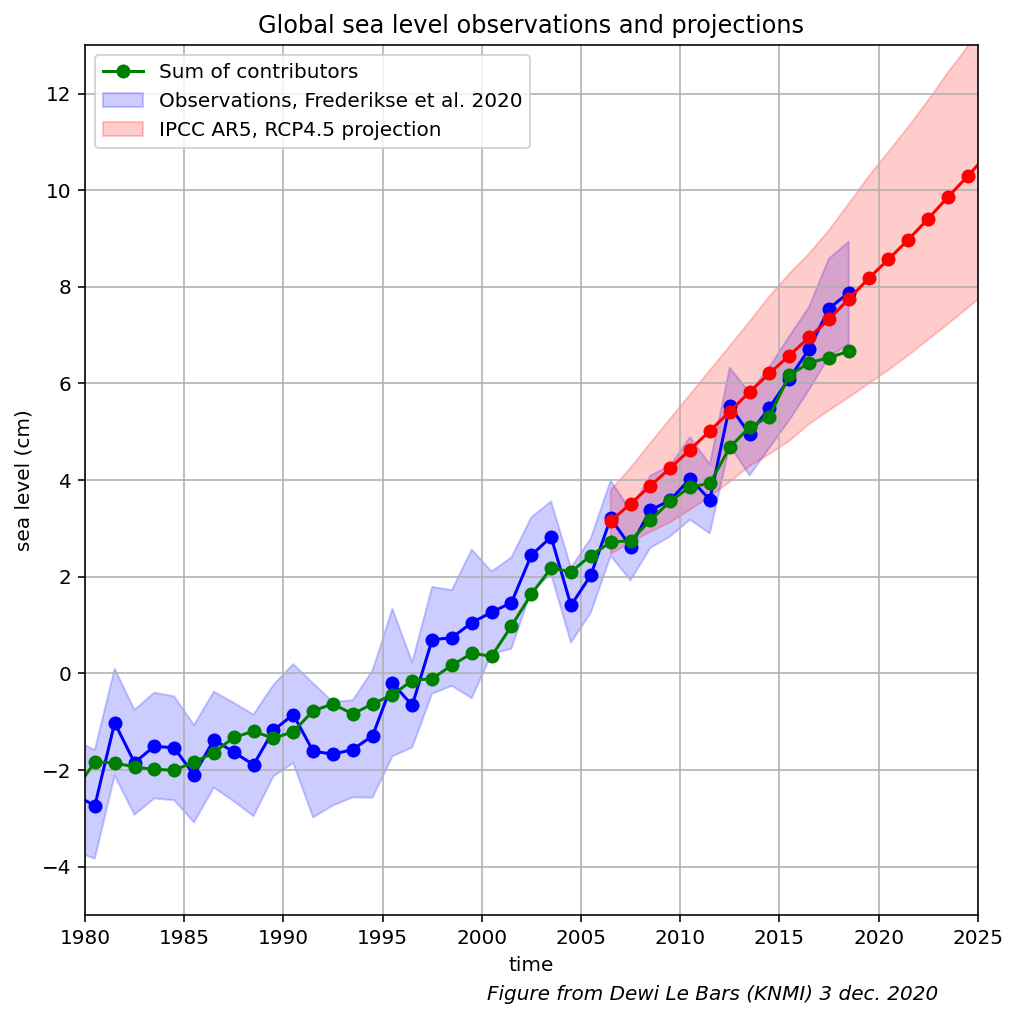

In [89]:
fig, ax = plt.subplots(figsize=(8,8))

ax.fill_between(cts_df.index, cts_df['Observed GMSL [lower]'], 
                cts_df['Observed GMSL [upper]'], color='blue',alpha=0.2,
               label='Observations, Frederikse et al. 2020')
ax.plot(cts_df['Observed GMSL [mean]'], 'ob-')

ax.plot(cts_df['Sum of contributors [mean]'], 'og-', label='Sum of contributors')

ax.fill_between(cts_df.index, cts_df['rcp45_sumlower'], 
                cts_df['rcp45_sumupper'], color='red',alpha=0.2,
               label='IPCC AR5, RCP4.5 projection')
ax.plot(cts_df['rcp45_summid'], 'or-')
# ax.text(0.45, -0.08, 'Figure from Dewi Le Bars (KNMI) 3 dec. 2020', 
#        va='top', ha='left', style='italic', transform=ax.transAxes )
#ax.set_aspect(1)
ax.set_xlim([1980,2025])
ax.set_ylim([-5,13])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Global sea level observations and projections')
ax.grid(True)
plt.legend(loc='upper left')

#plt.savefig('../figures/GlobalComparisonProjObs_rcp45.png', dpi=150)

### Make the comparison process by process

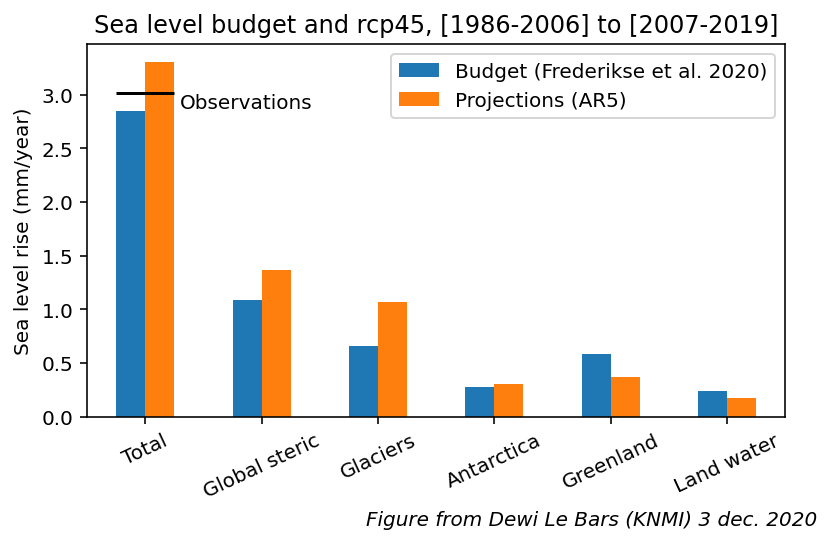

In [90]:
sp = 2007
ep = 2019
ref_s = 1986
ref_e = 2006
tot_years = (sp+ep)/2 - (ref_e+ref_s)/2

# !!! Only works for the mean contribution, for the uncertainty it doesn't
# Multiply by 10 to get mm/yr instead of cm/yr
proj_diff = ar5_proj_df.loc[sp:ep].mean()/tot_years*10
budget_diff = (fts.loc[sp:ep].mean() - fts.loc[ref_s:ref_e].mean())/tot_years

# Build a new dataframe for comparison purposes:
index = ['Total', 'Global steric', 'Glaciers', 'Antarctica', 
         'Greenland', 'Land water']

obs_budget = [budget_diff['Sum of contributors [mean]'], budget_diff['Steric [mean]'],
             budget_diff['Glaciers [mean]'], budget_diff['Antarctic Ice Sheet [mean]'],
             budget_diff['Greenland Ice Sheet [mean]'], budget_diff['Terrestrial Water Storage [mean]']]

proj_diff_ant = proj_diff[f'{SCE}_antdynmid'] + proj_diff[f'{SCE}_antsmbmid']
proj_diff_gre = proj_diff[f'{SCE}_greendynmid'] + proj_diff[f'{SCE}_greensmbmid']
ar5_proj = [proj_diff[f'{SCE}_summid'], proj_diff[f'{SCE}_expansionmid'], 
            proj_diff[f'{SCE}_glaciermid'], proj_diff_ant, proj_diff_gre, 
            proj_diff[f'{SCE}_landwatermid']]

comp_df = pd.DataFrame({'Budget (Frederikse et al. 2020)': obs_budget,
                        'Projections (AR5)': ar5_proj}, index=index)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
comp_df.plot.bar(ax=ax, rot=25)

ax.hlines(y=budget_diff['Observed GMSL [mean]'], xmin=-0.25, xmax=0.25, color='black')
ax.text(0.3, budget_diff['Observed GMSL [mean]'], 'Observations', va='top', ha='left') #transform=ax.transAxes
ax.set_ylabel('Sea level rise (mm/year)')
ax.set_title(f'Sea level budget and {SCE}, ['+str(ref_s)+'-'+str(ref_e)+']'+' to ['+str(sp)+'-'+str(ep)+']' )
# ax.text(0.4, -0.25, 'Figure from Dewi Le Bars (KNMI) 3 dec. 2020', 
#        va='top', ha='left', style='italic', transform=ax.transAxes )
plt.tight_layout()

#plt.savefig(f'../figures/GlobalComparisonBudgetProj_{SCE}.png', dpi=150)

<AxesSubplot:xlabel='time'>

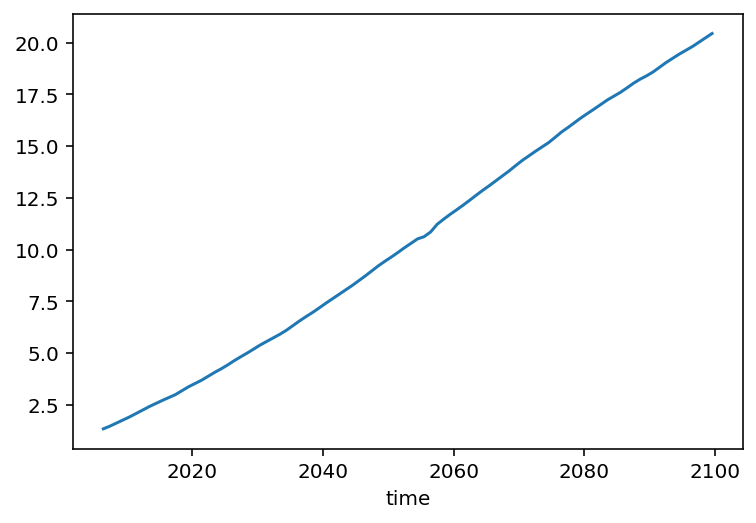

In [53]:
cts_df[f'{SCE}_expansionmid'].plot()

In [54]:
cts_df[f'{SCE}_expansionmid'].loc[2006.5:2018.5].mean()

2.24212646484375

<AxesSubplot:xlabel='time'>

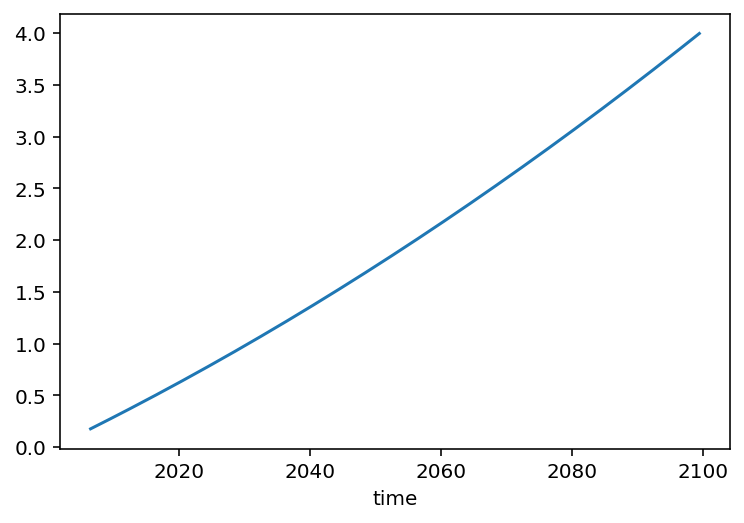

In [55]:
cts_df[f'{SCE}_greendynmid'].plot() #+ proj_diff[f'{SCE}_greensmbmid']

<AxesSubplot:xlabel='time'>

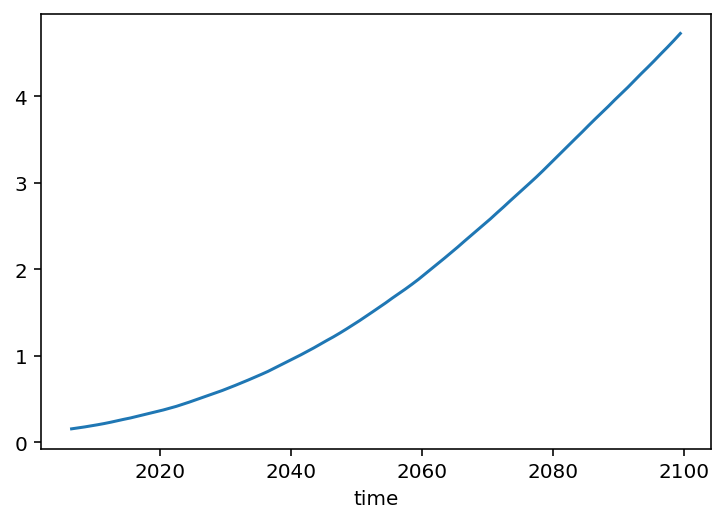

In [56]:
cts_df[f'{SCE}_greensmbmid'].plot()

In [57]:
print(cts_df[f'{SCE}_greendynmid'].loc[2006.5])
print(cts_df[f'{SCE}_greensmbmid'].loc[2006.5])

0.17710063
0.15689798


In [58]:
print(cts_df[f'{SCE}_antdynmid'].loc[2006.5])
print(cts_df[f'{SCE}_antsmbmid'].loc[2006.5])

0.29147485
-0.0076499046


The 1.5 mm for Greenland SMB, 1.5 mm for Greenland dynamic and 2.5 for Antarctic dynamics were forgoten. See numbers in AR5 13SM1.4.

Are these 5.5 mm also missing in the total?

In [59]:
ar5_proj_df.iloc[0]

rcp45_sumlower          2.474571
rcp45_summid            3.153517
rcp45_sumupper          3.790679
rcp45_antdynlower       0.270528
rcp45_antdynmid         0.291475
rcp45_antdynupper       0.312422
rcp45_antsmblower      -0.018906
rcp45_antsmbmid        -0.007650
rcp45_antsmbupper      -0.000886
rcp45_expansionlower    0.823883
rcp45_expansionmid      1.341645
rcp45_expansionupper    1.859406
rcp45_glacierlower      0.986211
rcp45_glaciermid        1.132433
rcp45_glacierupper      1.322468
rcp45_greendynlower     0.168414
rcp45_greendynmid       0.177101
rcp45_greendynupper     0.185787
rcp45_greensmblower     0.149072
rcp45_greensmbmid       0.156898
rcp45_greensmbupper     0.173014
rcp45_landwaterlower    0.026543
rcp45_landwatermid      0.038110
rcp45_landwaterupper    0.049677
Name: 2006.5, dtype: float32

In [60]:
sl_sum =  (ar5_proj_df['rcp45_antdynmid'] + ar5_proj_df['rcp45_antsmbmid'] 
+ ar5_proj_df['rcp45_expansionmid'] + ar5_proj_df['rcp45_glaciermid'] 
+ ar5_proj_df['rcp45_greendynmid'] + ar5_proj_df['rcp45_greensmbmid'] 
+ ar5_proj_df['rcp45_landwatermid'])
sl_sum

time
2006.5     3.130012
2007.5     3.482908
2008.5     3.851628
2009.5     4.213586
2010.5     4.594285
            ...    
2095.5    50.066746
2096.5    50.657642
2097.5    51.273117
2098.5    51.901310
2099.5    52.520767
Length: 94, dtype: float32

In [61]:
ar5_proj_df['rcp45_summid']

time
2006.5     3.153517
2007.5     3.510992
2008.5     3.883757
2009.5     4.248186
2010.5     4.631002
            ...    
2095.5    50.355194
2096.5    50.951130
2097.5    51.574306
2098.5    52.208321
2099.5    52.836323
Name: rcp45_summid, Length: 94, dtype: float32

<AxesSubplot:xlabel='time'>

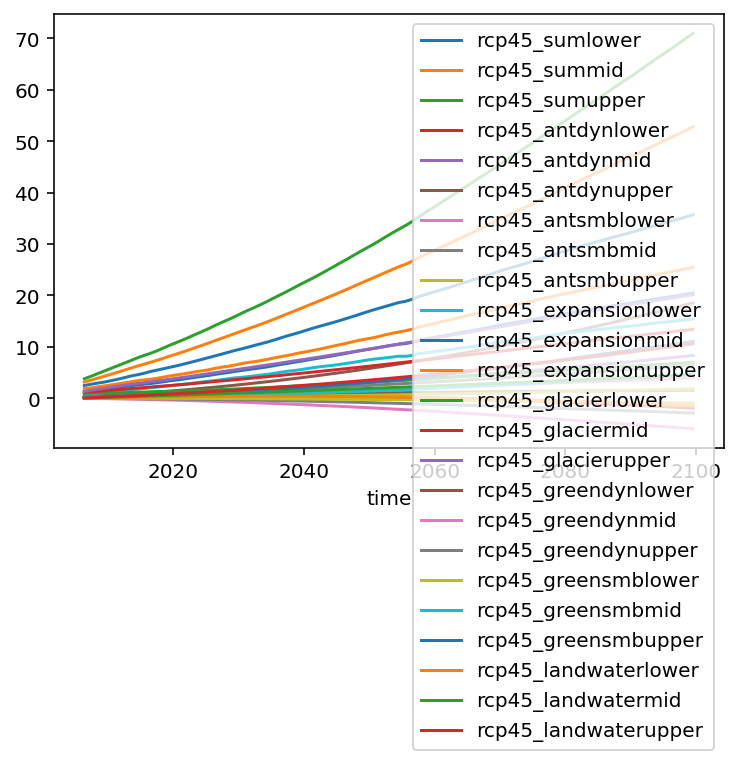

In [62]:
ar5_proj_df.plot()